# Network Science project - January 2024

##### done by Arina Lopukhina

dataset: Jérôme Kunegis. KONECT – The Koblenz Network Collection. In Proc. Int. Conf. on World Wide Web Companion, pages 1343–1350, 2013.  

D. Lusseau, K. Schneider, O. J. Boisseau, P. Haase, E. Slooten, and S. M. Dawson. The bottlenose dolphin community of Doubtful Sound features a large proportion of long-lasting associations. Behav. Ecol. and Sociobiol., 54:396–405, 2003.

### Exploratory Data Analysis - Dolphins

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


G = nx.read_gml('dolphins.gml')
nodes_df = pd.DataFrame(list(G.nodes(data=True)), columns=['Node', 'Attributes'])
edges_df = pd.DataFrame(list(G.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
print("Nodes data:")
print(nodes_df.head())
print("\nEdges data:")
print(edges_df.head())

Nodes data:
         Node Attributes
0        Beak         {}
1  Beescratch         {}
2      Bumper         {}
3         CCL         {}
4       Cross         {}

Edges data:
  Source    Target Attributes
0   Beak      Fish         {}
1   Beak      Grin         {}
2   Beak  Haecksel         {}
3   Beak       SN9         {}
4   Beak      SN96         {}


In [2]:
merged_df_source = pd.merge(edges_df, nodes_df, left_on='Source', right_on='Node', how='left', suffixes=('_Edge', '_Node'))
graph = pd.merge(merged_df_source, nodes_df, left_on='Target', right_on='Node', how='left', suffixes=('_Source', '_Target'))
graph.drop(['Node_Source', 'Node_Target'], axis=1, inplace=True)
graph.head()

,Source,Target,Attributes_Edge,Attributes_Node,Attributes
0,Beak,Fish,{},{},{}
1,Beak,Grin,{},{},{}
2,Beak,Haecksel,{},{},{}
3,Beak,SN9,{},{},{}
4,Beak,SN96,{},{},{}


In [3]:
graph.describe()

,Source,Target,Attributes_Edge,Attributes_Node,Attributes
count,159,159,159,159,159
unique,47,50,1,1,1
top,Grin,Web,{},{},{}
freq,10,9,159,159,159


so we can eliminate Attributes since they do not contain any info

In [4]:
graph = graph.drop(['Attributes_Edge', 'Attributes_Node','Attributes'],axis = 1)

In [5]:
graph.head()

,Source,Target
0,Beak,Fish
1,Beak,Grin
2,Beak,Haecksel
3,Beak,SN9
4,Beak,SN96


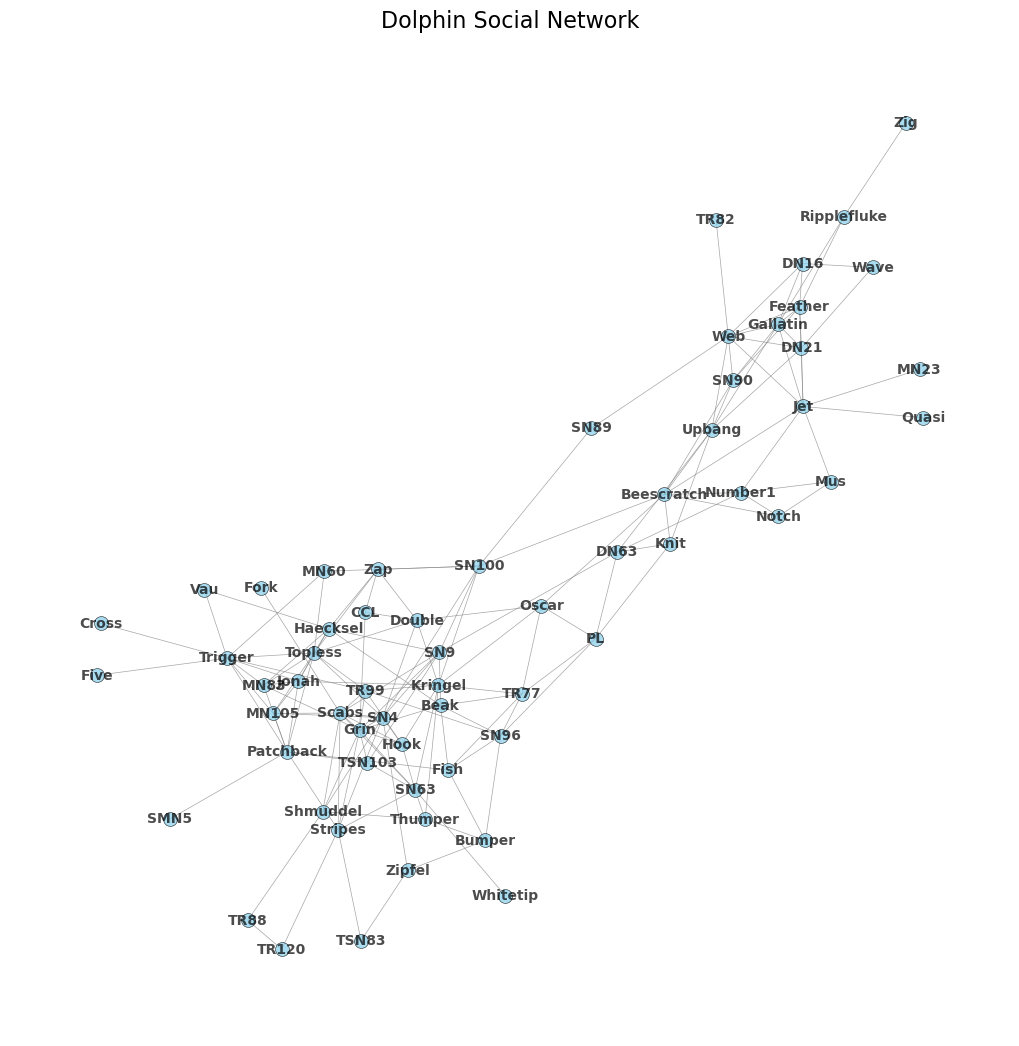

In [6]:
pos = nx.spring_layout(G, seed = 42)
plt.figure(figsize=(10, 10))

nx.draw(G, pos, with_labels=True, node_size=100, font_size=10, font_color="black", font_weight="bold", edge_color='gray', alpha=0.7, node_color='skyblue', linewidths=0.5, width=0.5, edgecolors='black')

plt.title('Dolphin Social Network', fontsize=16)
plt.show()

Number of Nodes: 62
Number of Edges: 159
Number of Connected Components: 1
Density of the Network: 0.0841
The network diameter is: 8


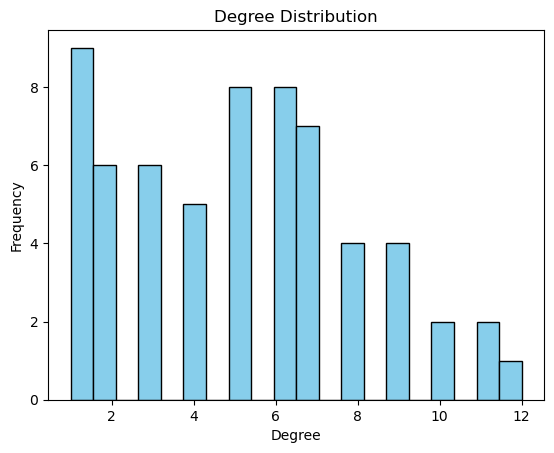

In [7]:
# Basic Statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
num_connected_components = nx.number_connected_components(G)
density = nx.density(G)
diameter = nx.diameter(G)
print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")
print(f"Number of Connected Components: {num_connected_components}")
print(f"Density of the Network: {density:.4f}")
print(f"The network diameter is: {diameter}")

degree_sequence = [d for n, d in G.degree()]
plt.hist(degree_sequence, bins=20, color='skyblue', edgecolor='black')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

In [8]:
import operator
node_degrees = dict(G.degree())
most_connected_node = max(node_degrees.items(), key=operator.itemgetter(1))
k_max = most_connected_node[1]
least_connected_node = min(node_degrees.items(), key=operator.itemgetter(1))
k_min = least_connected_node[1]
avg_degree = sum(dict(G.degree()).values()) / num_nodes
average_shortest_path = nx.average_shortest_path_length(G)

print(f"Average Shortest Path Length: {average_shortest_path:.4f}")
print(f"The most connected individual has degree k_max ~ {k_max}")
print(f"The least connected individual has degree k_min ~ {k_min}")
print(f"\nAverage Degree: {avg_degree:.4f}")


Average Shortest Path Length: 3.3570
The most connected individual has degree k_max ~ 12
The least connected individual has degree k_min ~ 1

Average Degree: 5.1290


In [9]:
# Triangles
num_triangles = sum(nx.triangles(G).values()) // 3  #to avoid counting each triangle 3 times
avg_num_triangles = num_triangles / num_nodes
max_num_triangles = max(nx.triangles(G).values())

print(f"\nNumber of Triangles: {num_triangles}")
print(f"Average Number of Triangles: {avg_num_triangles:.4f}")
print(f"Maximum Number of Triangles: {max_num_triangles}")


Number of Triangles: 95
Average Number of Triangles: 1.5323
Maximum Number of Triangles: 17


In [10]:
betweenness_centrality = nx.betweenness_centrality(G)
top_5_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:5]
print("Top 5 highest betweenness centrality:")
for node in top_5_nodes:
    print(f"Node {node}: Betweenness Centrality = {betweenness_centrality[node]:.4f}")

Top 5 highest betweenness centrality:
Node SN100: Betweenness Centrality = 0.2482
Node Beescratch: Betweenness Centrality = 0.2133
Node SN9: Betweenness Centrality = 0.1431
Node SN4: Betweenness Centrality = 0.1386
Node DN63: Betweenness Centrality = 0.1182


In [11]:
closeness_centrality = nx.closeness_centrality(G)
top_5_nodes_closeness = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:5]
print("Top 5 highest closeness centrality:")
for node in top_5_nodes_closeness:
    print(f"Node {node}: Closeness Centrality = {closeness_centrality[node]:.4f}")

Top 5 highest closeness centrality:
Node SN100: Closeness Centrality = 0.4178
Node SN9: Closeness Centrality = 0.4040
Node SN4: Closeness Centrality = 0.3987
Node Kringel: Closeness Centrality = 0.3910
Node Grin: Closeness Centrality = 0.3765


In [12]:
eigenvector_centrality = nx.eigenvector_centrality(G)
top_5_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]

print("Top 5 highest eigenvector centrality:")
for node in top_5_nodes:
    print(f"Node {node}: Eigenvector Centrality = {eigenvector_centrality[node]:.4f}")

Top 5 highest eigenvector centrality:
Node Grin: Eigenvector Centrality = 0.3158
Node SN4: Eigenvector Centrality = 0.3006
Node Topless: Eigenvector Centrality = 0.2850
Node Scabs: Eigenvector Centrality = 0.2811
Node TR99: Eigenvector Centrality = 0.2177


In [13]:
nodes_with_loops = list(nx.nodes_with_selfloops(G))

if nodes_with_loops:
    print("\nThe graph contains loops.")
    print(f"Nodes with self-loops: {nodes_with_loops}")
else:
    print("\nThe graph does not contain loops.")


The graph does not contain loops.


In [14]:
global_clustering_coefficient = nx.average_clustering(G) 
print(f"Global Clustering Coefficient (by triplets): {global_clustering_coefficient:.4f}")
assortativity_coefficient = nx.degree_assortativity_coefficient(G)
print("Assortativity Coefficient:", assortativity_coefficient)

Global Clustering Coefficient (by triplets): 0.2590
Assortativity Coefficient: -0.04359402821531255


In [15]:
clustering_coefficients = nx.clustering(G)

sorted_nodes = sorted(clustering_coefficients.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes with highest clustering coefficients:")
for node, coefficient in sorted_nodes[:5]:
    print(f"Node {node}: Clustering Coefficient = {coefficient:.4f}")

Top 5 nodes with highest clustering coefficients:
Node Mus: Clustering Coefficient = 0.6667
Node Notch: Clustering Coefficient = 0.6667
Node Hook: Clustering Coefficient = 0.6000
Node SN90: Clustering Coefficient = 0.6000
Node DN21: Clustering Coefficient = 0.5333


In [16]:
bridges = list(nx.bridges(G))
print("Bridges in the graph:")
print(bridges)

Bridges in the graph:
[('Cross', 'Trigger'), ('Five', 'Trigger'), ('Fork', 'Scabs'), ('Jet', 'MN23'), ('Jet', 'Quasi'), ('Patchback', 'SMN5'), ('Ripplefluke', 'Zig'), ('SN63', 'Whitetip'), ('TR82', 'Web')]


#### What kind of a network is this?

Calculating best minimal value for power law fit
xmin progress: 90%
Power Law Fit Results:
Alpha = 5.130577274408163
Xmin = 6.0


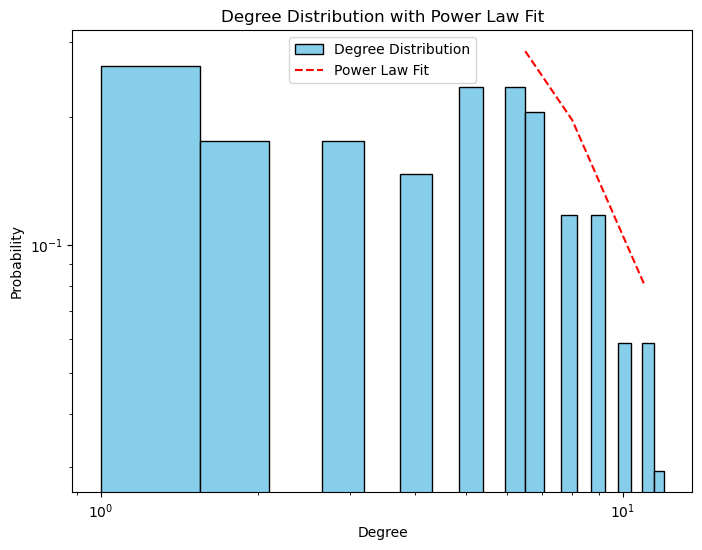

In [17]:
import matplotlib.pyplot as plt
import powerlaw

degree_sequence = [d for n, d in G.degree()]

plt.figure(figsize=(8, 6))
plt.hist(degree_sequence, bins=20, color='skyblue', edgecolor='black', density=True, label='Degree Distribution')
plt.title('Degree Distribution with Power Law Fit')
plt.xlabel('Degree')
plt.ylabel('Probability')

results = powerlaw.Fit(degree_sequence)
fig2 = results.plot_pdf(color='r', linestyle='--', label='Power Law Fit')
print("\nPower Law Fit Results:")
print("Alpha =", results.power_law.alpha)
print("Xmin =", results.power_law.xmin)
plt.legend()
plt.show()

## Community detection: Greedy algorithm

In [18]:
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import modularity

greedy_communities = list(greedy_modularity_communities(G))
greedy_modularity_value = modularity(G, greedy_communities)
print(f"Network Modularity (Greedy algorithm): {greedy_modularity_value:.3f}")
greedy_num_partitions = len(greedy_communities)
greedy_partition_sizes = [len(community) for community in greedy_communities]
greedy_partition_sizes.sort(reverse=True)

print(f"Number of partitions (communities) obtained by Greedy algorithm: {greedy_num_partitions}")
print(f"Size of each partition: {greedy_partition_sizes}")

Network Modularity (Greedy algorithm): 0.495
Number of partitions (communities) obtained by Greedy algorithm: 4
Size of each partition: [23, 22, 15, 2]


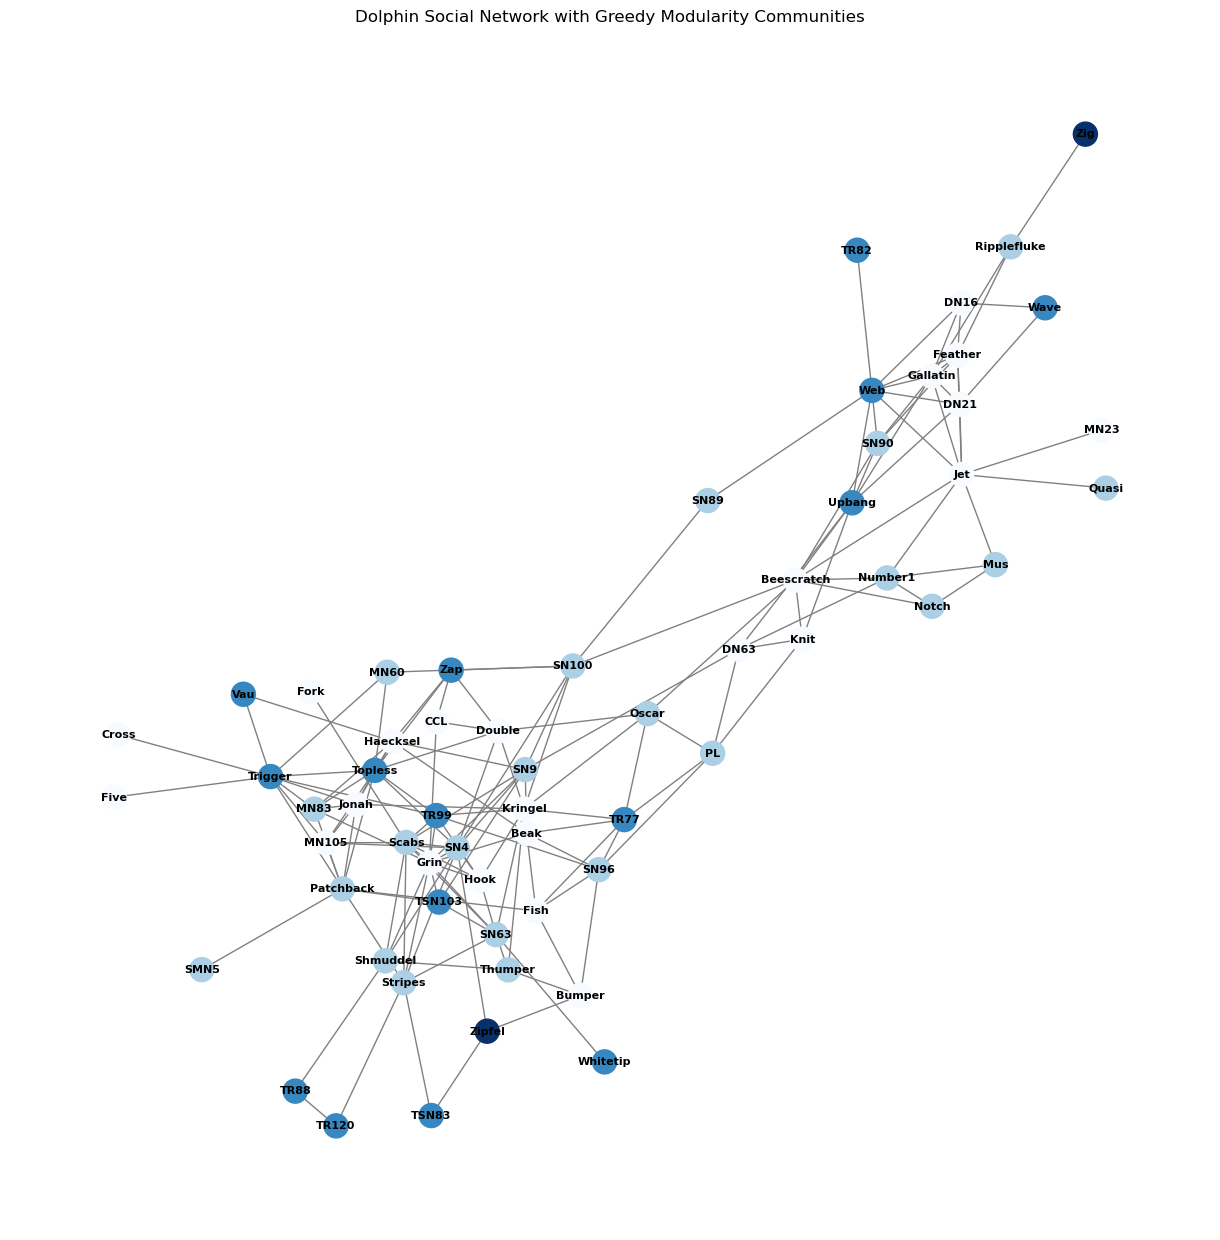

In [19]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
colors = [i for i, community in enumerate(greedy_communities) for _ in community]
nx.draw(G, pos, with_labels=True, cmap=plt.cm.Blues, node_color=colors, font_size=8, font_color="black", font_weight="bold", edge_color='gray')
plt.title('Dolphin Social Network with Greedy Modularity Communities')
plt.show()

## Louvain algorithm

In [20]:
import community
partition = community.best_partition(G)

modularity_value = community.modularity(partition, G)
print(f"Network Modularity: {modularity_value:.3f}")
num_partitions = max(partition.values()) + 1
print(f"Number of communities obtained by Louvain algorithm: {num_partitions}")

Network Modularity: 0.513
Number of communities obtained by Louvain algorithm: 5


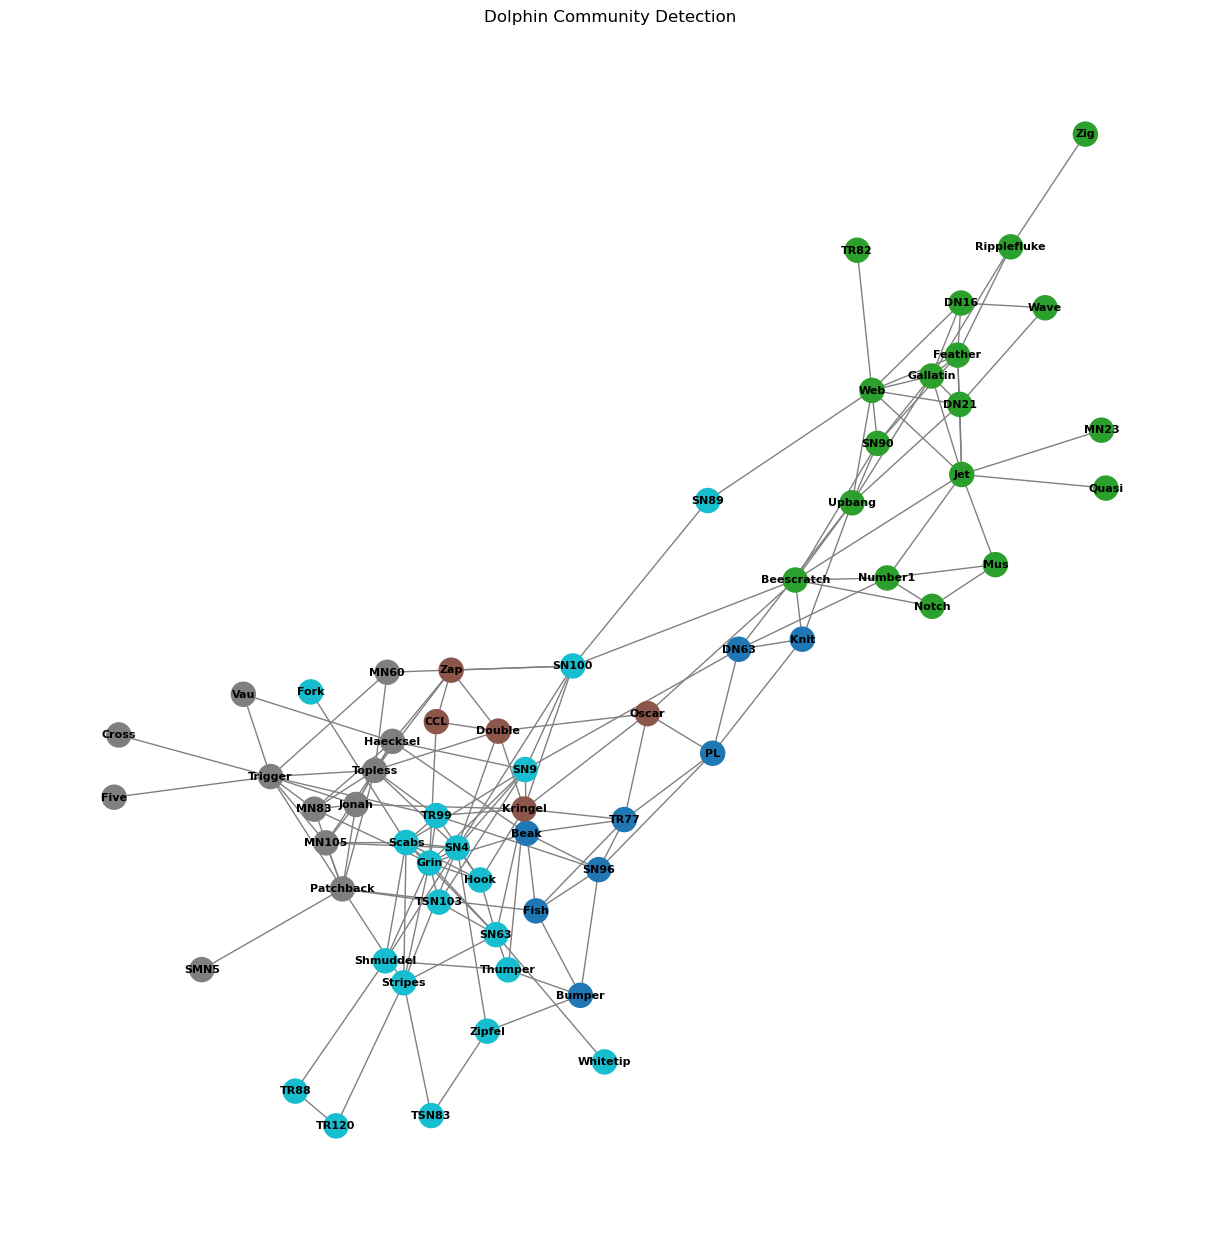

In [21]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed = 42)  
node_colors = [partition[node] for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.tab10, font_size=8, font_color="black", font_weight="bold", edge_color='gray')
plt.title('Dolphin Community Detection')
plt.show()

# Supervised methods - Link predictions

## Data prep

In [22]:
import networkx as nx
import numpy as np
import pandas as pd
from math import log


G = nx.karate_club_graph()

# positive instances = 1
positive_edges = list(G.edges())
positive_datapoints = [(u, v, 1) for u, v in positive_edges]

# negative instances = 0
negative_datapoints = []
nodes_set = list(G.nodes())
count = 0
while count < len(positive_datapoints):
    u, v = np.random.choice(nodes_set, size=2, replace=True)
    if (not G.has_edge(u, v) and not G.has_edge(v, u)):
        negative_datapoints.append((u, v, 0))
        count += 1

dat = pd.DataFrame(positive_datapoints + negative_datapoints, columns=['u', 'v', 'label'])
# Jaccard Coefficient
dat['jaccard'] = [j for _, _, j in nx.jaccard_coefficient(G, zip(dat['u'], dat['v']))]
# Resource Allocation Index
dat['rai'] = [j for _, _, j in nx.resource_allocation_index(G, zip(dat['u'], dat['v']))]
# Adamic-Adar Index
dat['aai'] = [sum(1 / log(G.degree(w)) if G.degree(w) != 0 else 0 for w in nx.common_neighbors(G, u, v)) for u, v in zip(dat['u'], dat['v'])]
# Preferential Attachment Index
dat['pref'] = [j for _, _, j in nx.preferential_attachment(G, zip(dat['u'], dat['v']))]

dat.head(5)

,u,v,label,jaccard,rai,aai,pref
0,0,1,1,0.388889,2.050000,6.130717,144
1,0,2,1,0.238095,0.927778,2.977248,160
2,0,3,1,0.294118,1.161111,3.674792,96
3,0,4,1,0.117647,0.583333,1.631587,48
4,0,5,1,0.111111,0.583333,1.631587,64


In [23]:
from sklearn.model_selection import train_test_split

X = dat[['jaccard', 'rai', 'aai', 'pref']]
y = dat['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,jaccard,rai,aai,pref
56,0.055556,0.083333,0.402430,34
138,0.090909,0.083333,0.402430,20
123,0.000000,0.000000,0.000000,8
128,1.000000,0.142157,0.755386,4
127,0.000000,0.000000,0.000000,68


In [24]:
X_train.shape, y_train.shape

((124, 4), (124,))

## Logistic regression

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score
ct = ColumnTransformer(
    transformers=[
        ('scaler', MinMaxScaler(), ['jaccard', 'rai', 'aai', 'pref'])
    ],
    remainder='passthrough'
)

link_predictor = Pipeline([
    ('preprocessing', ct),
    ('classifier', LogisticRegression(penalty=None))
])

link_predictor.fit(X_train, y_train)
accuracy = link_predictor.score(X_test, y_test)
print(f"Accuracy on the testing set: {accuracy:.2%}")

Accuracy on the testing set: 84.38%


In [26]:
y_predicted = link_predictor.predict(X_test)

In [27]:
from sklearn.metrics import f1_score, recall_score, precision_score
print(f"F1 Score: {f1_score(y_test, y_predicted)}, Recall: {recall_score(y_test, y_predicted)}, Precision: {precision_score(y_test, y_predicted)}")

F1 Score: 0.8275862068965518, Recall: 0.8, Precision: 0.8571428571428571


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_predicted, y_test)

array([[15,  3],
       [ 2, 12]], dtype=int64)

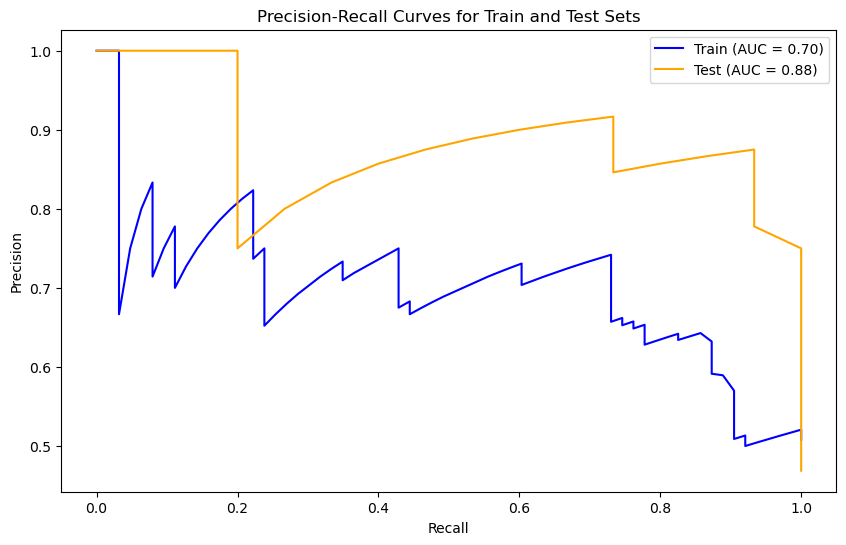

In [29]:
from sklearn.metrics import precision_recall_curve, auc

y_train_scores = link_predictor.predict_proba(X_train)[:, 1]
y_test_scores = link_predictor.predict_proba(X_test)[:, 1]
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_scores)
auc_train = auc(recall_train, precision_train)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_scores)
auc_test = auc(recall_test, precision_test)
plt.figure(figsize=(10, 6))
plt.plot(recall_train, precision_train, label=f'Train (AUC = {auc_train:.2f})', color='blue')
plt.plot(recall_test, precision_test, label=f'Test (AUC = {auc_test:.2f})', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Train and Test Sets')
plt.legend()
plt.show()

## SVM

In [30]:
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score

ct_svm = ColumnTransformer(
    transformers=[
        ('scaler', MinMaxScaler(), ['jaccard', 'rai', 'aai', 'pref'])
    ],
    remainder='passthrough'
)

link_predictor_svm = Pipeline([
    ('preprocessing', ct_svm),
    ('classifier', SVC(random_state=42))
])


param_grid = {'classifier__C': [0.1, 1, 10, 100],
              'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

grid_search = GridSearchCV(link_predictor_svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2%}")
y_predicted = best_model.predict(X_test)
f1_score_value = f1_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
print(f"F1 Score: {f1_score_value}, Recall: {recall}, Precision: {precision}")

Best Parameters: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
Accuracy: 71.88%
F1 Score: 0.6666666666666665, Recall: 0.6, Precision: 0.75


In [31]:
confusion_matrix(y_predicted, y_test)

array([[14,  6],
       [ 3,  9]], dtype=int64)

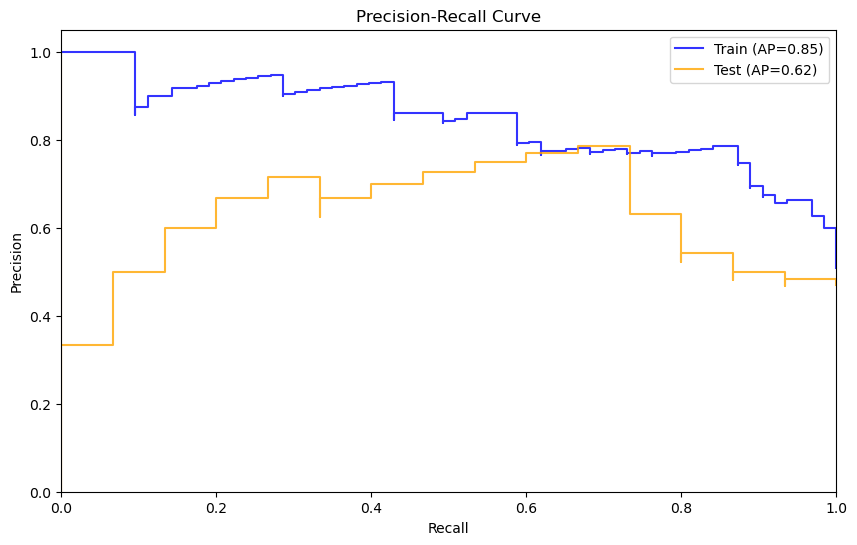

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
best_model.fit(X_train, y_train)
y_train_decision = best_model.decision_function(X_train)
y_test_decision = best_model.decision_function(X_test)
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_decision)
average_precision_train = average_precision_score(y_train, y_train_decision)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_decision)
average_precision_test = average_precision_score(y_test, y_test_decision)
plt.figure(figsize=(10, 6))
plt.step(recall_train, precision_train, color='blue', alpha=0.8, where='post', label=f'Train (AP={average_precision_train:.2f})')
plt.step(recall_test, precision_test, color='orange', alpha=0.8, where='post', label=f'Test (AP={average_precision_test:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

## XGBoost

In [33]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

link_predictor_xgb = Pipeline([
    ('preprocessing', ct),
    ('classifier', XGBClassifier(random_state=42))
])
link_predictor_xgb.fit(X_train, y_train)
param_grid = {'classifier__learning_rate': [0.01, 0.05, 0.1],
              'classifier__max_depth': [3, 4, 5],
              'classifier__n_estimators': [50, 75, 100]}
grid_search = GridSearchCV(link_predictor_xgb, param_grid, 
                           cv=5, 
                           scoring={'f1': make_scorer(f1_score)},
                           refit='f1',
                           verbose=1)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Accuracy on the testing set: {accuracy:.2%}")
y_predicted = best_model.predict(X_test)
f1_score_value = f1_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)

print(f"F1 Score: {f1_score_value}, Recall: {recall}, Precision: {precision}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 75}
Accuracy on the testing set: 71.88%
F1 Score: 0.6666666666666665, Recall: 0.6, Precision: 0.75


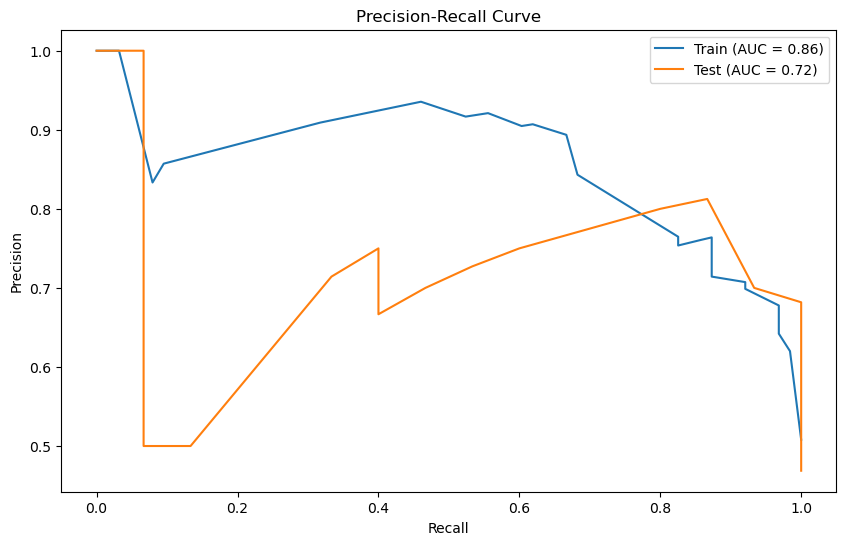

In [34]:
from sklearn.metrics import precision_recall_curve, auc
y_train_scores = best_model.predict_proba(X_train)[:, 1]
y_test_scores = best_model.predict_proba(X_test)[:, 1]
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_scores)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_scores)
auc_train = auc(recall_train, precision_train)
auc_test = auc(recall_test, precision_test)
plt.figure(figsize=(10, 6))
plt.plot(recall_train, precision_train, label=f'Train (AUC = {auc_train:.2f})')
plt.plot(recall_test, precision_test, label=f'Test (AUC = {auc_test:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## Human network - Zakary Karate Club

dataset: 
Jérôme Kunegis. KONECT – The Koblenz Network Collection. In Proc. Int. Conf. on World Wide Web Companion, pages 1343–1350, 2013.       
Wayne Zachary. An information flow model for conflict and fission in small groups. J. of Anthropol. Res., 33:452–473, 1977.

### Exploratory Data Analysis - Human network

In [35]:
G = nx.karate_club_graph()
nodes_df = pd.DataFrame(list(G.nodes(data=True)), columns=['Node', 'Attributes'])
edges_df = pd.DataFrame(list(G.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
print("Nodes data:")
print(nodes_df.head())
print("\nEdges data:")
print(edges_df.head())

Nodes data:
   Node          Attributes
0     0  {'club': 'Mr. Hi'}
1     1  {'club': 'Mr. Hi'}
2     2  {'club': 'Mr. Hi'}
3     3  {'club': 'Mr. Hi'}
4     4  {'club': 'Mr. Hi'}

Edges data:
   Source  Target     Attributes
0       0       1  {'weight': 4}
1       0       2  {'weight': 5}
2       0       3  {'weight': 3}
3       0       4  {'weight': 3}
4       0       5  {'weight': 3}


In [36]:
merged_df_source = pd.merge(edges_df, nodes_df, left_on='Source', right_on='Node', how='left', suffixes=('_Edge', '_Node'))
graph = pd.merge(merged_df_source, nodes_df, left_on='Target', right_on='Node', how='left', suffixes=('_Source', '_Target'))
graph.drop

<bound method DataFrame.drop of     Source  Target Attributes_Edge  Node_Source      Attributes_Node  \
0        0       1   {'weight': 4}            0   {'club': 'Mr. Hi'}   
1        0       2   {'weight': 5}            0   {'club': 'Mr. Hi'}   
2        0       3   {'weight': 3}            0   {'club': 'Mr. Hi'}   
3        0       4   {'weight': 3}            0   {'club': 'Mr. Hi'}   
4        0       5   {'weight': 3}            0   {'club': 'Mr. Hi'}   
..     ...     ...             ...          ...                  ...   
73      30      32   {'weight': 3}           30  {'club': 'Officer'}   
74      30      33   {'weight': 3}           30  {'club': 'Officer'}   
75      31      32   {'weight': 4}           31  {'club': 'Officer'}   
76      31      33   {'weight': 4}           31  {'club': 'Officer'}   
77      32      33   {'weight': 5}           32  {'club': 'Officer'}   

    Node_Target           Attributes  
0             1   {'club': 'Mr. Hi'}  
1             2   {'club'

In [37]:
graph.describe()

,Source,Target,Node_Source,Node_Target
count,78.000000,78.000000,78.000000,78.000000
mean,11.076923,21.423077,11.076923,21.423077
std,11.267433,11.506654,11.267433,11.506654
min,0.000000,1.000000,0.000000,1.000000
25%,1.000000,10.000000,1.000000,10.000000
50%,5.000000,27.000000,5.000000,27.000000
75%,23.000000,32.000000,23.000000,32.000000
max,32.000000,33.000000,32.000000,33.000000


we eliminate Attributes to match the Dolphins dataset

In [38]:
graph = graph.drop(['Attributes_Edge', 'Attributes_Node','Attributes', 'Node_Source','Node_Target'],axis = 1)

In [39]:
graph.head()

,Source,Target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


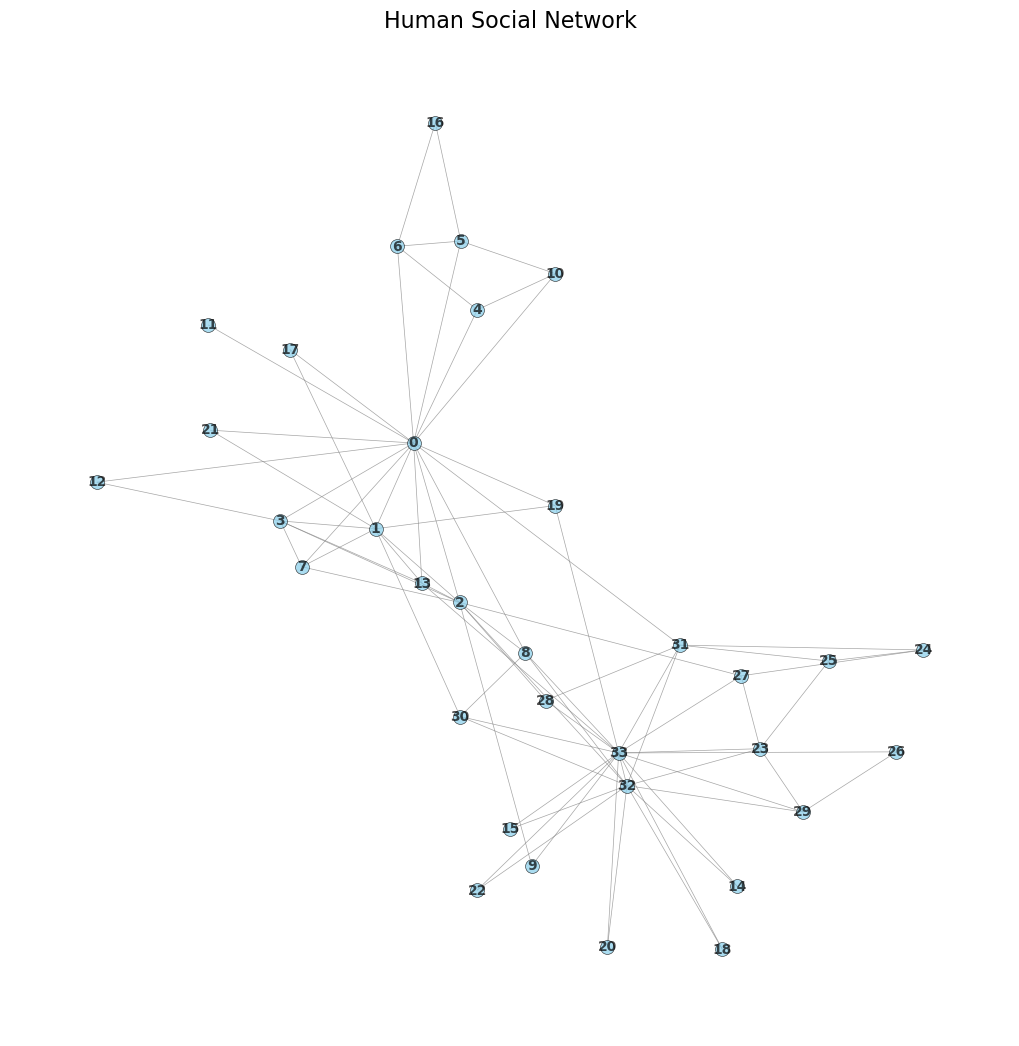

In [40]:
pos = nx.spring_layout(G, seed = 42)
plt.figure(figsize=(10, 10))

nx.draw(G, pos, with_labels=True, node_size=100, font_size=10, font_color="black", font_weight="bold", edge_color='gray', alpha=0.7, node_color='skyblue', linewidths=0.5, width=0.5, edgecolors='black')

plt.title('Human Social Network', fontsize=16)
plt.show()

Number of Nodes: 34
Number of Edges: 78
Number of Connected Components: 1
Density of the Network: 0.1390
The network diameter is: 5


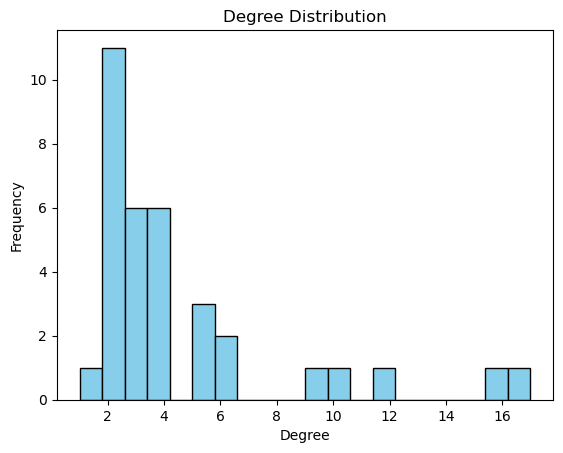

In [41]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
num_connected_components = nx.number_connected_components(G)
density = nx.density(G)
diameter = nx.diameter(G)
print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")
print(f"Number of Connected Components: {num_connected_components}")
print(f"Density of the Network: {density:.4f}")
print(f"The network diameter is: {diameter}")

degree_sequence = [d for n, d in G.degree()]
plt.hist(degree_sequence, bins=20, color='skyblue', edgecolor='black')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

In [42]:
node_degrees = dict(G.degree())
most_connected_node = max(node_degrees.items(), key=operator.itemgetter(1))
k_max = most_connected_node[1]
least_connected_node = min(node_degrees.items(), key=operator.itemgetter(1))
k_min = least_connected_node[1]
avg_degree = sum(dict(G.degree()).values()) / num_nodes
average_shortest_path = nx.average_shortest_path_length(G)

print(f"Average Shortest Path Length: {average_shortest_path:.4f}")
print(f"The most connected individual has degree k_max ~ {k_max}")
print(f"The least connected individual has degree k_min ~ {k_min}")
print(f"\nAverage Degree: {avg_degree:.4f}")


Average Shortest Path Length: 2.4082
The most connected individual has degree k_max ~ 17
The least connected individual has degree k_min ~ 1

Average Degree: 4.5882


In [43]:
# Triangles
num_triangles = sum(nx.triangles(G).values()) // 3  #to avoid counting each triangle 3 times
avg_num_triangles = num_triangles / num_nodes
max_num_triangles = max(nx.triangles(G).values())
print(f"\nNumber of Triangles: {num_triangles}")
print(f"Average Number of Triangles: {avg_num_triangles:.4f}")
print(f"Maximum Number of Triangles: {max_num_triangles}")


Number of Triangles: 45
Average Number of Triangles: 1.3235
Maximum Number of Triangles: 18


In [44]:
betweenness_centrality = nx.betweenness_centrality(G)
top_5_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:5]
print("Top 5 highest betweenness centrality:")
for node in top_5_nodes:
    print(f"Node {node}: Betweenness Centrality = {betweenness_centrality[node]:.4f}")

Top 5 highest betweenness centrality:
Node 0: Betweenness Centrality = 0.4376
Node 33: Betweenness Centrality = 0.3041
Node 32: Betweenness Centrality = 0.1452
Node 2: Betweenness Centrality = 0.1437
Node 31: Betweenness Centrality = 0.1383


In [45]:
closeness_centrality = nx.closeness_centrality(G)
top_5_nodes_closeness = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:5]
print("Top 5 highest closeness centrality:")
for node in top_5_nodes_closeness:
    print(f"Node {node}: Closeness Centrality = {closeness_centrality[node]:.4f}")

Top 5 highest closeness centrality:
Node 0: Closeness Centrality = 0.5690
Node 2: Closeness Centrality = 0.5593
Node 33: Closeness Centrality = 0.5500
Node 31: Closeness Centrality = 0.5410
Node 8: Closeness Centrality = 0.5156


In [46]:
eigenvector_centrality = nx.eigenvector_centrality(G)
top_5_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]
print("Top 5 highest eigenvector centrality:")
for node in top_5_nodes:
    print(f"Node {node}: Eigenvector Centrality = {eigenvector_centrality[node]:.4f}")

Top 5 highest eigenvector centrality:
Node 33: Eigenvector Centrality = 0.3734
Node 0: Eigenvector Centrality = 0.3555
Node 2: Eigenvector Centrality = 0.3172
Node 32: Eigenvector Centrality = 0.3087
Node 1: Eigenvector Centrality = 0.2660


In [47]:
nodes_with_loops = list(nx.nodes_with_selfloops(G))

if nodes_with_loops:
    print("\nThe graph contains loops.")
    print(f"Nodes with self-loops: {nodes_with_loops}")
else:
    print("\nThe graph does not contain loops.")


The graph does not contain loops.


In [48]:
global_clustering_coefficient = nx.average_clustering(G) 
print(f"Global Clustering Coefficient (by triplets): {global_clustering_coefficient:.4f}")
assortativity_coefficient = nx.degree_assortativity_coefficient(G)
print("Assortativity Coefficient:", assortativity_coefficient)

Global Clustering Coefficient (by triplets): 0.5706
Assortativity Coefficient: -0.47561309768461413


In [49]:
clustering_coefficients = nx.clustering(G)
sorted_nodes = sorted(clustering_coefficients.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes with highest clustering coefficients:")
for node, coefficient in sorted_nodes[:5]:
    print(f"Node {node}: Clustering Coefficient = {coefficient:.4f}")

Top 5 nodes with highest clustering coefficients:
Node 7: Clustering Coefficient = 1.0000
Node 12: Clustering Coefficient = 1.0000
Node 14: Clustering Coefficient = 1.0000
Node 15: Clustering Coefficient = 1.0000
Node 16: Clustering Coefficient = 1.0000


In [50]:
bridges = list(nx.bridges(G))
print("Bridges in the graph:")
print(bridges)

Bridges in the graph:
[(0, 11)]


#### What kind of a network is this?

Calculating best minimal value for power law fit
xmin progress: 90%
Power Law Fit Results:
Alpha = 2.873564922157329
Xmin = 3.0


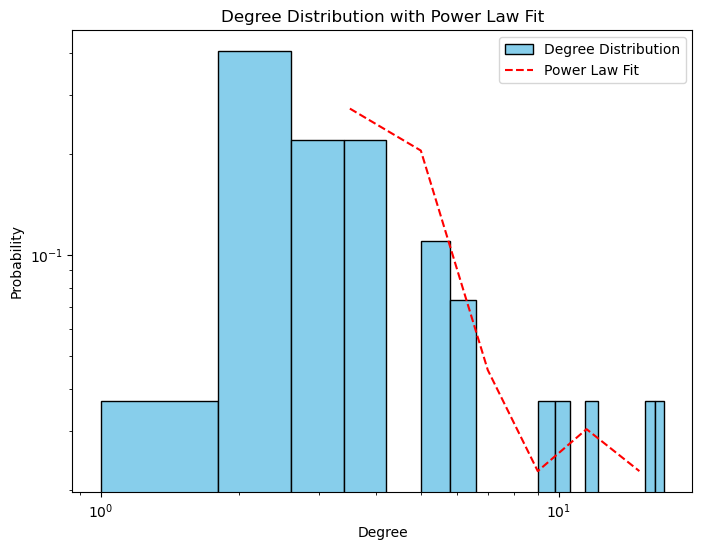

In [51]:
degree_sequence = [d for n, d in G.degree()]

plt.figure(figsize=(8, 6))
plt.hist(degree_sequence, bins=20, color='skyblue', edgecolor='black', density=True, label='Degree Distribution')
plt.title('Degree Distribution with Power Law Fit')
plt.xlabel('Degree')
plt.ylabel('Probability')

results = powerlaw.Fit(degree_sequence)
fig2 = results.plot_pdf(color='r', linestyle='--', label='Power Law Fit')
print("\nPower Law Fit Results:")
print("Alpha =", results.power_law.alpha)
print("Xmin =", results.power_law.xmin)
plt.legend()
plt.show()

## Community detection: Greedy algorithm

In [52]:
greedy_communities = list(greedy_modularity_communities(G))
greedy_modularity_value = modularity(G, greedy_communities)
print(f"Network Modularity (Greedy algorithm): {greedy_modularity_value:.3f}")
greedy_num_partitions = len(greedy_communities)
greedy_partition_sizes = [len(community) for community in greedy_communities]
greedy_partition_sizes.sort(reverse=True)

print(f"Number of partitions (communities) obtained by Greedy algorithm: {greedy_num_partitions}")
print(f"Size of each partition: {greedy_partition_sizes}")

Network Modularity (Greedy algorithm): 0.411
Number of partitions (communities) obtained by Greedy algorithm: 3
Size of each partition: [17, 9, 8]


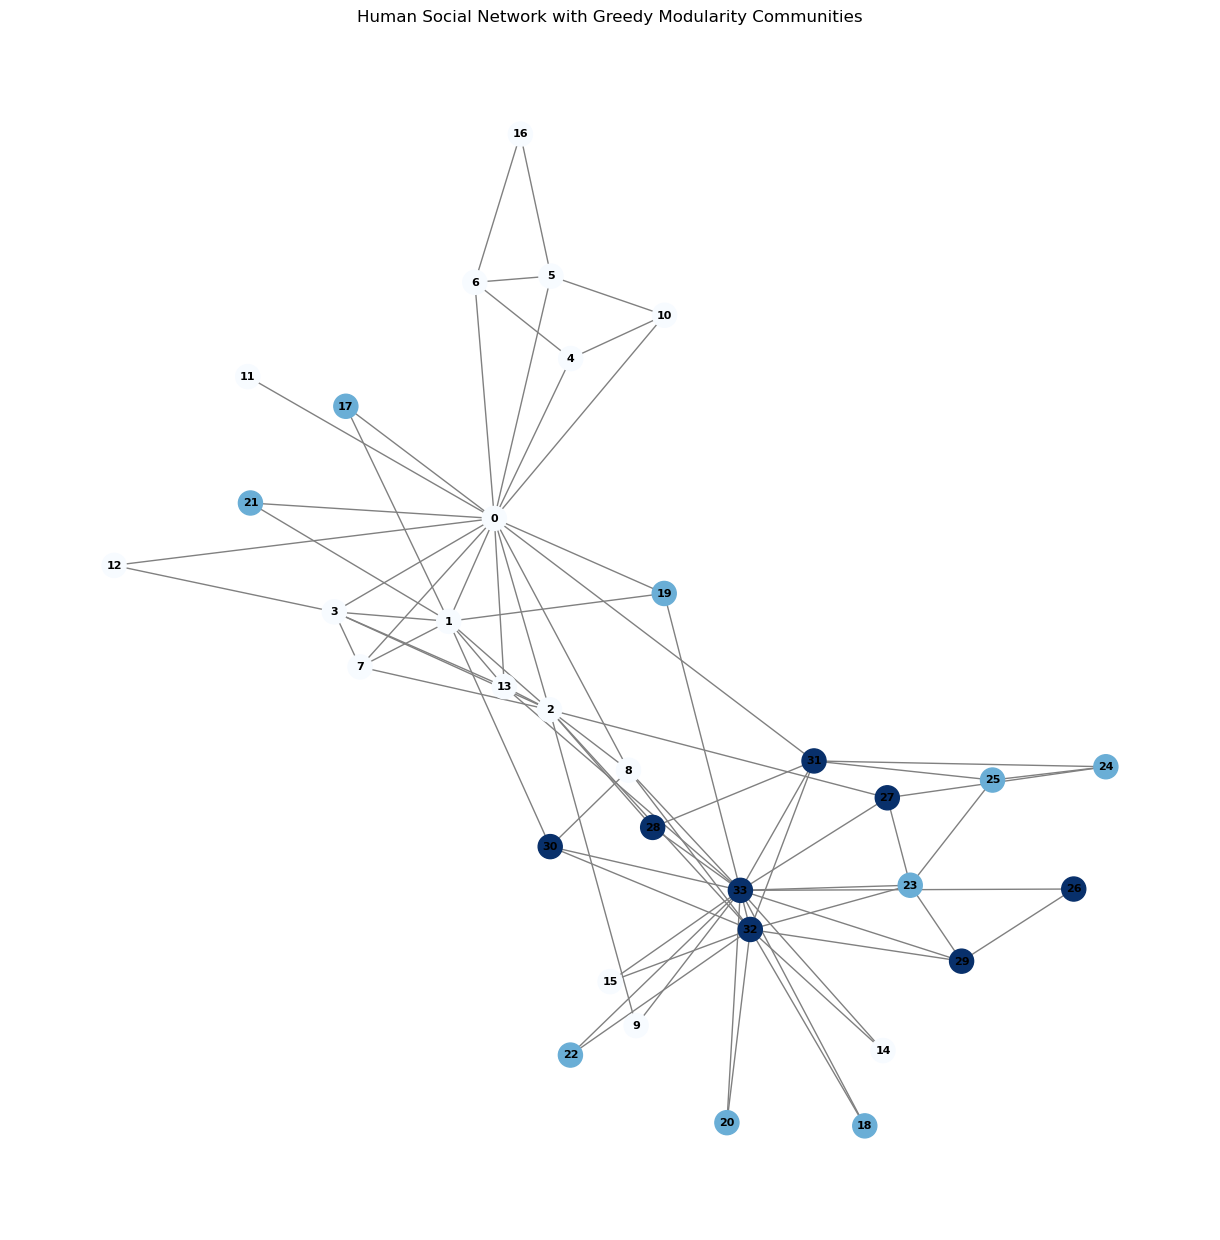

In [53]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
colors = [i for i, community in enumerate(greedy_communities) for _ in community]
nx.draw(G, pos, with_labels=True, cmap=plt.cm.Blues, node_color=colors, font_size=8, font_color="black", font_weight="bold", edge_color='gray')
plt.title('Human Social Network with Greedy Modularity Communities')
plt.show()

## Louvain algorithm

In [54]:
partition = community.best_partition(G)

modularity_value = community.modularity(partition, G)
print(f"Network Modularity: {modularity_value:.3f}")
num_partitions = max(partition.values()) + 1
print(f"Number of communities obtained by Louvain algorithm: {num_partitions}")

Network Modularity: 0.445
Number of communities obtained by Louvain algorithm: 4


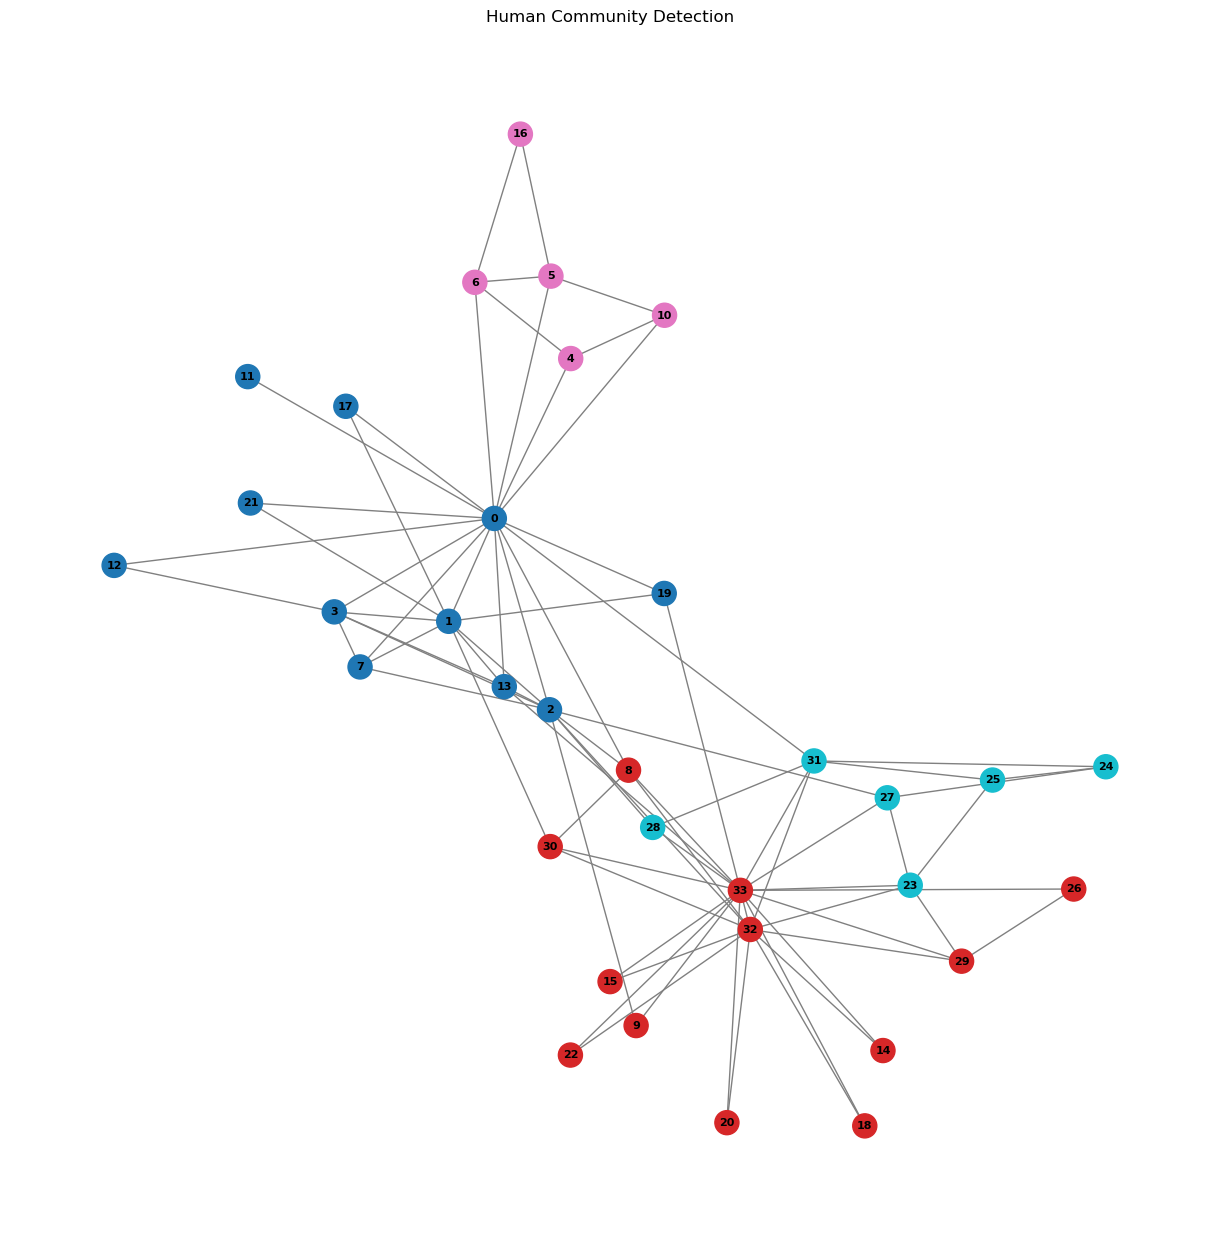

In [55]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed = 42)  
node_colors = [partition[node] for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.tab10, font_size=8, font_color="black", font_weight="bold", edge_color='gray')
plt.title('Human Community Detection')
plt.show()

# Supervised methods - Link predictions

## Data prep

In [56]:
G = nx.karate_club_graph()

# positive instances = 1
positive_edges = list(G.edges())
positive_datapoints = [(u, v, 1) for u, v in positive_edges]

# negative instances = 0
negative_datapoints = []
nodes_set = list(G.nodes())
count = 0
while count < len(positive_datapoints):
    u, v = np.random.choice(nodes_set, size=2, replace=True)
    if (not G.has_edge(u, v) and not G.has_edge(v, u)):
        negative_datapoints.append((u, v, 0))
        count += 1

dat = pd.DataFrame(positive_datapoints + negative_datapoints, columns=['u', 'v', 'label'])
# Jaccard Coefficient
dat['jaccard'] = [j for _, _, j in nx.jaccard_coefficient(G, zip(dat['u'], dat['v']))]
# Resource Allocation Index
dat['rai'] = [j for _, _, j in nx.resource_allocation_index(G, zip(dat['u'], dat['v']))]
# Adamic-Adar Index
dat['aai'] = [sum(1 / log(G.degree(w)) if G.degree(w) != 0 else 0 for w in nx.common_neighbors(G, u, v)) for u, v in zip(dat['u'], dat['v'])]
# Preferential Attachment Index
dat['pref'] = [j for _, _, j in nx.preferential_attachment(G, zip(dat['u'], dat['v']))]

dat.head(5)

,u,v,label,jaccard,rai,aai,pref
0,0,1,1,0.388889,2.050000,6.130717,144
1,0,2,1,0.238095,0.927778,2.977248,160
2,0,3,1,0.294118,1.161111,3.674792,96
3,0,4,1,0.117647,0.583333,1.631587,48
4,0,5,1,0.111111,0.583333,1.631587,64


In [57]:
X = dat[['jaccard', 'rai', 'aai', 'pref']]
y = dat['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,jaccard,rai,aai,pref
56,0.055556,0.083333,0.402430,34
138,0.333333,0.058824,0.352956,4
123,0.200000,0.166667,0.558111,9
128,0.000000,0.000000,0.000000,12
127,0.142857,0.058824,0.352956,12


In [58]:
X_train.shape, y_train.shape

((124, 4), (124,))

## Logistic regression

In [59]:
ct = ColumnTransformer(
    transformers=[
        ('scaler', MinMaxScaler(), ['jaccard', 'rai', 'aai', 'pref'])
    ],
    remainder='passthrough'
)

link_predictor = Pipeline([
    ('preprocessing', ct),
    ('classifier', LogisticRegression(penalty=None))
])

link_predictor.fit(X_train, y_train)
accuracy = link_predictor.score(X_test, y_test)
print(f"Accuracy on the testing set: {accuracy:.2%}")

Accuracy on the testing set: 68.75%


In [60]:
y_predicted = link_predictor.predict(X_test)

In [61]:
f1_score(y_test, y_predicted), recall_score(y_test, y_predicted), precision_score(y_test, y_predicted)

(0.6428571428571429, 0.6, 0.6923076923076923)

In [62]:
confusion_matrix(y_predicted, y_test)

array([[13,  6],
       [ 4,  9]], dtype=int64)

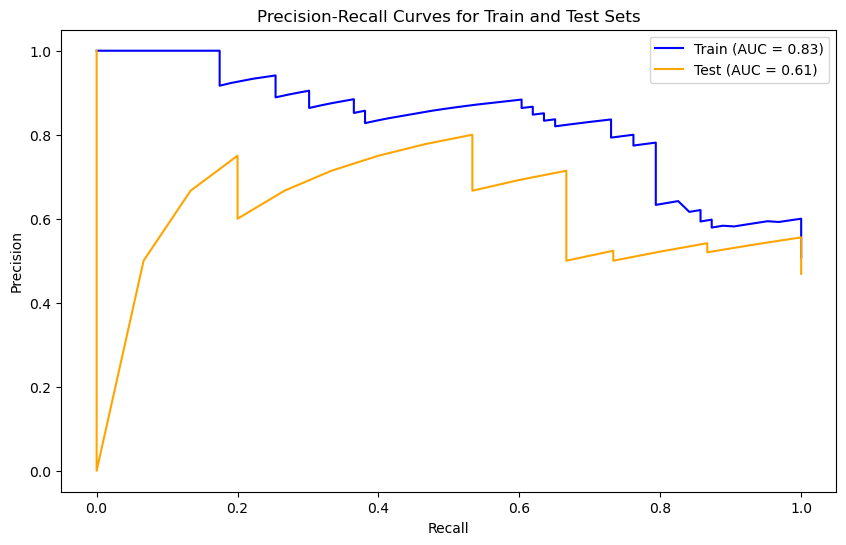

In [63]:
y_train_scores = link_predictor.predict_proba(X_train)[:, 1]
y_test_scores = link_predictor.predict_proba(X_test)[:, 1]
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_scores)
auc_train = auc(recall_train, precision_train)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_scores)
auc_test = auc(recall_test, precision_test)
plt.figure(figsize=(10, 6))
plt.plot(recall_train, precision_train, label=f'Train (AUC = {auc_train:.2f})', color='blue')
plt.plot(recall_test, precision_test, label=f'Test (AUC = {auc_test:.2f})', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Train and Test Sets')
plt.legend()
plt.show()

## SVM

In [64]:
ct_svm = ColumnTransformer(
    transformers=[
        ('scaler', MinMaxScaler(), ['jaccard', 'rai', 'aai', 'pref'])
    ],
    remainder='passthrough'
)

link_predictor_svm = Pipeline([
    ('preprocessing', ct_svm),
    ('classifier', SVC(random_state=42))
])


param_grid = {'classifier__C': [0.1, 1, 10, 100],
              'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

grid_search = GridSearchCV(link_predictor_svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2%}")
y_predicted = best_model.predict(X_test)
f1_score_value = f1_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
print(f"F1 Score: {f1_score_value}, Recall: {recall}, Precision: {precision}")

Best Parameters: {'classifier__C': 1, 'classifier__kernel': 'rbf'}
Accuracy: 81.25%
F1 Score: 0.8125, Recall: 0.8666666666666667, Precision: 0.7647058823529411


In [65]:
confusion_matrix(y_predicted, y_test)

array([[13,  2],
       [ 4, 13]], dtype=int64)

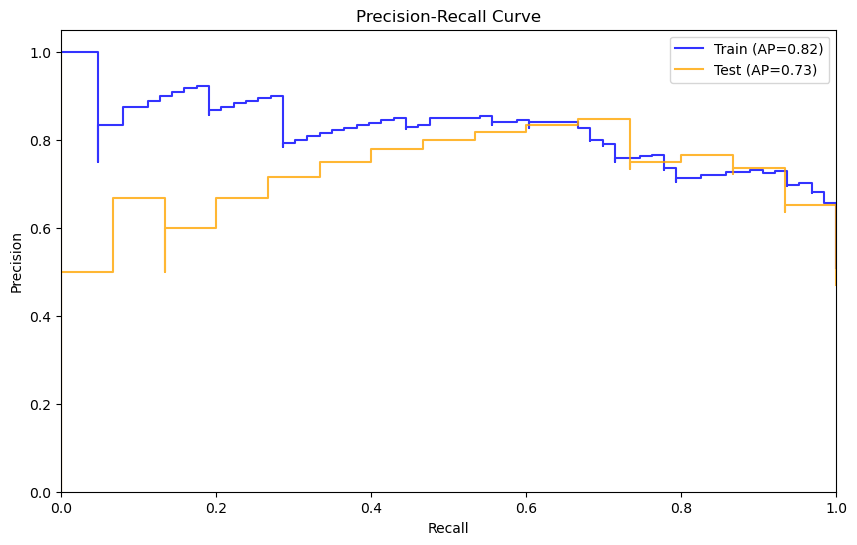

In [66]:
best_model.fit(X_train, y_train)
y_train_decision = best_model.decision_function(X_train)
y_test_decision = best_model.decision_function(X_test)
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_decision)
average_precision_train = average_precision_score(y_train, y_train_decision)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_decision)
average_precision_test = average_precision_score(y_test, y_test_decision)
plt.figure(figsize=(10, 6))
plt.step(recall_train, precision_train, color='blue', alpha=0.8, where='post', label=f'Train (AP={average_precision_train:.2f})')
plt.step(recall_test, precision_test, color='orange', alpha=0.8, where='post', label=f'Test (AP={average_precision_test:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

## XGBoost

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 75}
Accuracy on the testing set: 68.75%
F1 Score: 0.6428571428571429, Recall: 0.6, Precision: 0.6923076923076923


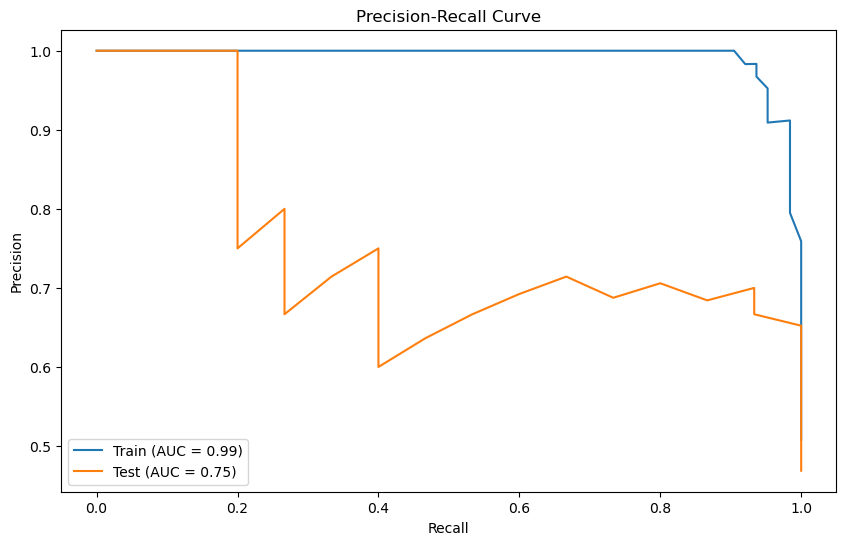

In [68]:
link_predictor_xgb = Pipeline([
    ('preprocessing', ct),
    ('classifier', XGBClassifier(random_state=42))
])
link_predictor_xgb.fit(X_train, y_train)
param_grid = {'classifier__learning_rate': [0.01, 0.05, 0.1],
              'classifier__max_depth': [3, 4, 5],
              'classifier__n_estimators': [10, 30, 40, 50, 75, 100]}
grid_search = GridSearchCV(link_predictor_xgb, param_grid, 
                           cv=5, 
                           scoring={'f1': make_scorer(f1_score)},
                           refit='f1',
                           verbose=1)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Accuracy on the testing set: {accuracy:.2%}")
y_predicted = best_model.predict(X_test)
f1_score_value = f1_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)

print(f"F1 Score: {f1_score_value}, Recall: {recall}, Precision: {precision}")


y_train_scores = best_model.predict_proba(X_train)[:, 1]
y_test_scores = best_model.predict_proba(X_test)[:, 1]
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_scores)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_scores)
auc_train = auc(recall_train, precision_train)
auc_test = auc(recall_test, precision_test)
plt.figure(figsize=(10, 6))
plt.plot(recall_train, precision_train, label=f'Train (AUC = {auc_train:.2f})')
plt.plot(recall_test, precision_test, label=f'Test (AUC = {auc_test:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
